# CDS: Numerical Methods - Assignment 3

#### See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord!

- Solutions must be submitted via Brightspace as a Jupyter notebook (\*.ipynb) before **Wednesday, February 17, 8:30 CET.**

### Handing-in:

1. Click "Kernel -> Restart & Run All"
2. Check all outputs (In[\*] or Out[\*]) for errors and **resolve them if necessary**
3. Click again "Kernel -> Restart & Run All"
4. Save as assignment_03_TEAM-NUMBER.ipynb by clicking "File -> Save as ..."
5. Download your assignment_\*.ipynb file
6. Upload it **in time (before the deadline)** to Brightspace

## 1. Discrete and Fast Fourier Transforms (DFT and FFT)

In the following we will implement a DFT algorithm and, based on that, a FFT algorithm. Our aim is to experience the drastic improvement of computational time in the FFT case.

### Task 1.1

Implement a Python function $\text{DFT(yk)}$ which returns the Fourier transform defined by

\begin{equation}
\beta_j = \sum^{N-1}_{k=0} f(x_k) e^{-ij x_k}
\end{equation}

with $x_k = \frac{2\pi k}{N}$ and $j = 0, 1, ..., N-1$. The $\text{yk}$ should represent the array corresponding to $y_k = f(x_k)$. Please note that this definition is slightly different to the one we introduced in the lecture. Here we follow the notation of Numpy and Scipy.

Hint: try to write the sum as matrix-vector product and use $\text{numpy.dot()}$ to evaluate it.

In [1]:
import numpy as np

def DFT(yk):
    N = np.shape(yk)[0]
    xk = np.linspace(0,N-1, N) * 2 * np.pi / N
    beta = np.array([np.dot(yk, np.exp(-1j * i * xk)) for i in range(N)])
    return beta

### Task 1.2 

Implement two unit tests for your $\text{DFT(yk)}$ function by comparing its results to Numpy’s FFT function $\text{numpy.fft.fft(yk)}$. Use the following functions:

\begin{equation}
    y_k = f(x_k) = e^{20i x_k} + e^{40 i x_k}
\end{equation}
and
\begin{equation}
    y_k = f(x_k) = e^{i 5 x_k^2}
\end{equation}

with $N = 128$. Start with plotting the real and imaginary parts of $\beta_j$ vs. $j$.

Hint: use $\text{numpy.allclose()}$! 

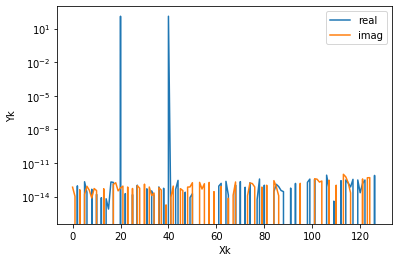

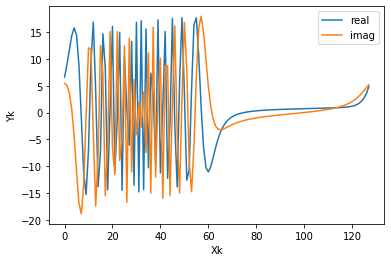

In [2]:
import ipytest
import matplotlib.pyplot as plt
ipytest.autoconfig()

N = 128
xk = np.linspace(0,N-1, N) * 2 * np.pi / N
yk = np.exp(20j *xk) + np.exp(40j *xk)
beta_dft = DFT(yk)
#print(beta_dft)
plt.plot(np.arange(N),np.real(beta_dft), label = 'real')
plt.plot(np.arange(N),np.imag(beta_dft), label = 'imag')
plt.yscale('log')
plt.xlabel('Xk')
plt.ylabel('Yk')
plt.legend()

plt.figure()
yk = np.exp(5j * xk**2)
beta_dft = DFT(yk)
#print(beta_dft)
plt.plot(np.arange(N),np.real(beta_dft), label = 'real')
plt.plot(np.arange(N),np.imag(beta_dft), label = 'imag')
plt.xlabel('Xk')
plt.ylabel('Yk')
plt.legend()


In [3]:
%%run_pytest[clean]

def test_func1():
    N = 128
    xk = np.linspace(0,N-1, N) * 2 * np.pi / N
    yk = np.exp(20j *xk) + np.exp(40j *xk)
    beta_dft = DFT(yk)
    beta_fft = np.fft.fft(yk)
    print(beta_dft, '\n\n')
    print(beta_fft, '\n\n')
    assert np.allclose(beta_dft, beta_fft, rtol=1e-9,atol=1e-11, equal_nan=False)
    
def test_func2():
    N = 128
    xk = np.linspace(0,N-1, N) * 2 * np.pi / N
    yk = np.exp(5j * xk**2)
    beta_dft = DFT(yk)
    beta_fft = np.fft.fft(yk)
    print(beta_dft, '\n\n')
    print(beta_fft, '\n\n')
    assert np.allclose(beta_dft, beta_fft, rtol=1e-9,atol=1e-11, equal_nan=False)

..                                                                       [100%]
2 passed in 0.10s


### Task 1.3

Analyze the evaluation-time scaling of your $\text{DFT(yk)}$ function with the help of the timeit
module. Base your code on the following example:

In [4]:
import timeit

tOut = timeit.repeat(stmt=lambda: DFT(yk), number=10, repeat=5)
tMean = np.mean(tOut)

This example evaluates $\text{DFT(yk)}$ 5 × 10 times and stores the resulting 5 evaluation times in tOut. Afterwards we calculate the mean value of these 5 repetitions. 
Use this example to calculate and plot the evaluation time of your $\text{DFT(yk)}$ function for $N = 2^2, 2^3, ..., 2^M$. Depending on your implementation you might be able to go up to $M = 10$. Be careful and increase M just step by step!

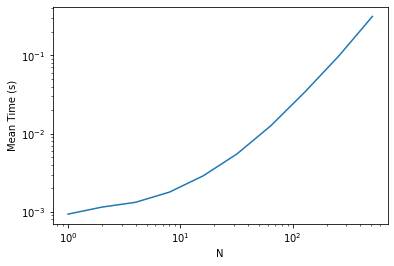

In [5]:
import timeit
M = 10
means = np.zeros(M)
for n in range(M):
    N = 2**n
    xk = np.linspace(0,N-1, N) * 2 * np.pi / N
    yk = np.exp(20j *xk) + np.exp(40j *xk)
    tOut = timeit.repeat(stmt=lambda: DFT(yk), number=10, repeat=5)
    tMean = np.mean(tOut)
    means[n] = tMean

plt.plot(2**np.arange(M), means)
plt.xlabel('N')
plt.ylabel('Mean Time (s)')
plt.yscale('log')
plt.xscale('log')

### Task 1.4

A very simple FFT algorithm can be derived by the following separation of the sum from
above:

\begin{align}
     \beta_j = \sum^{N-1}_{k=0} f(x_k) e^{-ij \frac{2\pi k}{N}} 
         &= \sum^{N/2 - 1}_{k=0} f(x_{2k}) e^{-ij \frac{2\pi 2k}{N}} 
          + \sum^{N/2 - 1}_{k=0} f(x_{2k+1}) e^{-ij \frac{2\pi (2k+1)}{N}}\\ 
         &= \sum^{N/2 - 1}_{k=0} f(x_{2k}) e^{-ij \frac{2\pi k}{N/2}}
          + \sum^{N/2 - 1}_{k=0} f(x_{2k+1}) e^{-ij \frac{2\pi k}{N/2}} e^{-ij \frac{2\pi}{N}}\\
         &= \beta^{\text{even}}_j + \beta^{\text{odd}}_j e^{-ij \frac{2\pi}{N}}
\end{align}

where $\beta^{\text{even}}_j$ is the Fourier transform based on only even $k$ (or $x_k$) and $\beta^{\text{odd}}_j$ the Fourier transform based on only odd $k$. In case $N = 2^M$ this even/odd separation can be done again and again in a recursive way. 

Use the template below to implement a $\text{FFT(yk)}$ function, making use of your $\text{DFT(yk)}$ function from above. Use an assertion to check if $N$ is a power of 2.
Make sure that you get the same results as before by comparing the results from $\text{DFT(yk)}$
and $\text{FFT(yk)}$ for both functions defined in task 1.2.

In [6]:
def FFT(yk):
    N = np.shape(yk)[0]
    
    assert np.ceil(np.log2(N)) == np.floor(np.log2(N))
    
    if(N <= 2):
        return DFT(yk)
    
    else:
        betaEven = FFT(yk[[(2*n) for n in range(int(N/2))]])
        betaOdd = FFT(yk[[2*n+1 for n in range(int(N/2))]])
        
        expTerms = np.exp(-1j * 2.0 * np.pi * np.arange(N) / N)
        
        # Remember : beta_j is periodic in j !
        betaEvenFull = np.concatenate([betaEven, betaEven])
        betaOddFull = np.concatenate([betaOdd, betaOdd])
        
        return betaEvenFull + expTerms * betaOddFull

In [7]:
%%run_pytest[clean]

def test_func1():
    N = 128
    xk = np.linspace(0,N-1, N) * 2 * np.pi / N
    yk = np.exp(20j *xk) + np.exp(40j *xk)
    beta_dft = DFT(yk)
    beta_fft = FFT(yk)
    print(beta_dft, '\n\n')
    print(beta_fft, '\n\n')
    assert np.allclose(beta_dft, beta_fft, rtol=1e-9,atol=1e-11, equal_nan=False)
    
def test_func2():
    N = 128
    xk = np.linspace(0,N-1, N) * 2 * np.pi / N
    yk = np.exp(5j * xk**2)
    beta_dft = DFT(yk)
    beta_fft = FFT(yk)
    print(beta_dft, '\n\n')
    print(beta_fft, '\n\n')
    assert np.allclose(beta_dft, beta_fft, rtol=1e-9,atol=1e-11, equal_nan=False)

..                                                                       [100%]
2 passed in 0.10s


### Task 1.5

Analyze the evaluation-time scaling of your $\text{FFT(yk)}$ function with the help of the timeit module and compare it to the scaling of the $\text{DFT(yk)}$ function.

100%|██████████| 15/15 [14:44<00:00, 59.00s/it] 


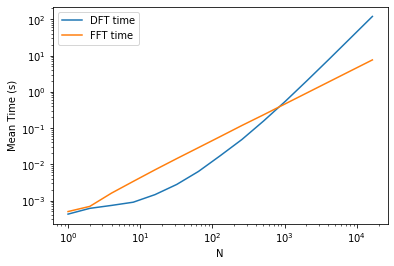

In [8]:
import timeit
from tqdm import tqdm
M = 15
means_DFT = np.zeros(M)
means_FFT = np.zeros(M)

for n in tqdm(range(M)):
    N = 2**n
    xk = np.linspace(0,N-1, N) * 2 * np.pi / N
    yk = np.exp(20j *xk) + np.exp(40j *xk)
    tOut_DFT = timeit.repeat(stmt=lambda: DFT(yk), number=5, repeat=5)
    tOut_FFT = timeit.repeat(stmt=lambda: FFT(yk), number = 5, repeat = 5)
    means_DFT[n] = np.mean(tOut_DFT)
    means_FFT[n] = np.mean(tOut_FFT)

plt.plot(2**np.arange(M), means_DFT, label='DFT time')
plt.plot(2**np.arange(M), means_FFT, label='FFT time')
plt.xlabel('N')
plt.ylabel('Mean Time (s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

## 2. Composite Numerical Integration: Trapezoid and Simpson Rules

In the following we will implement the composite trapezoid and Simpson rules to calculate definite integrals. These rules are defined by

\begin{align}
	\int_a^b \, f(x)\, dx &\approx \frac{h}{2} \left[ f(a) + 2 \sum_{j=1}^{n-1} f(x_j) + f(b) \right] 
                          &\text{trapezoid} \\
                          &\approx \frac{h}{3} \left[ f(a) + 2 \sum_{j=1}^{n/2-1} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j-1}) + f(b) \right]	 
                          &\text{Simpson}
\end{align}
    
with $a = x_0 < x_1 < \dots < x_{n-1} < x_n = b$ and $x_k = a + kh$. Here $k = 0, \dots, n$ and $h = (b-a) / n$ is the step size.

### Task 2.1

Implement both integration schemes as Python functions $\text{trapz(yk, dx)}$ and $\text{simps(yk, dx)}$. The argument $\text{yk}$ is an array of length $n+1$ representing $y_k = f(x_k)$ and $\text{dx}$ is the step size $h$. Compare your results with Scipy's functions $\text{scipy.integrate.trapz(yk, xk)}$ and $\text{scipy.integrate.simps(yk, xk)}$ for a $f(x_k)$ of your choice.

In [9]:
from scipy import integrate
import numpy as np

def func(n, dx):
    return dx*np.arange(0,n)

def trapz(yk, dx):
    return dx/2*((yk[0]+yk[-1])+2*np.sum(yk[1:-1]))
    
def simps(yk, dx):
    return dx/3*(yk[0]+yk[-1]+2*np.sum(yk[2:-1:2])+4*np.sum(yk[1:-1:2]))


In [10]:
n=31
dx=1/(n-1)
xk=func(n,dx)


yk=np.sin(xk)**2

trapz(yk, dx)

0.272759843737035

In [11]:
integrate.trapz(yk, dx=dx)

0.272759843737035

In [12]:
simps(yk, dx)

0.2726756183339428

In [13]:
integrate.simps(yk,dx=dx)

0.2726756183339428

The result is the same, only for odd number of intervals scipy simpson rule uses a different algorithm

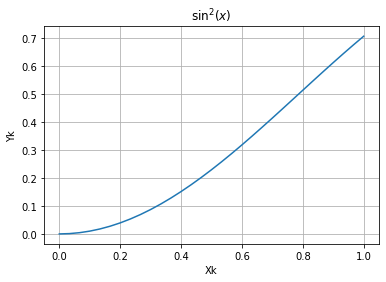

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(xk, yk)

ax.set(xlabel='Xk', ylabel='Yk', title='$\sin^2(x)$')
ax.grid()

plt.show()

### Task 2.2

Implement at least one unit test for each of your integration functions.

In [15]:
import ipytest
ipytest.autoconfig()

Defaulting to user installation because normal site-packages is not writeable


In [16]:
%%run_pytest[clean]

import numpy as np

def test_trapz():
    
    xk=0.1*np.arange(0,11)
    yk=np.ones_like(xk)
    myResult = trapz(yk, 1)
    correctResult = 10
    
    assert np.allclose(myResult, correctResult,
                       rtol=1e-10,
                       atol=1e-12,
                       equal_nan=False)
    
def test_simps():
    
    xk=np.arange(0,11)
    yk=np.ones_like(xk)
    myResult = simps(yk, 1)
    correctResult = 10
    
    assert np.allclose(myResult, correctResult,
                       rtol=1e-10,
                       atol=1e-12,
                       equal_nan=False)

..                                                                       [100%]
2 passed in 0.05s


### Task 2.3

Study the accuracy of these integration routines by calculating the following integrals for a variety of step sizes $h$:

- $\int_0^1 \, x\, dx$
- $\int_0^1 \, x^2\, dx$
- $\int_0^1 \, x^\frac{1}{2}\, dx$

The integration error is defined as the difference (not the absolute difference) between your numerical results and the exact results. Plot the integration error as a function of $h$ for both integration routines and all listed functions. Comment on the comparison between both integration routines. Does the sign of the error match your expectations? Why?

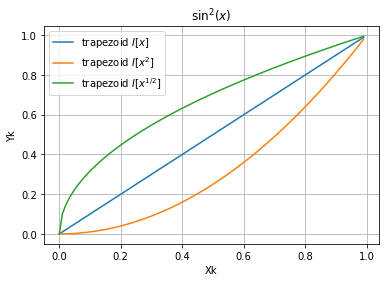

In [17]:
import matplotlib.pyplot as plt

def x_k(n, dx):
    return dx*np.arange(0,n)

fig, ax = plt.subplots()

f=x_k(100,1/100)
ax.plot(f, f)
ax.plot(f, f**2)
ax.plot(f, f**(1/2))

ax.set(xlabel='Xk', ylabel='Yk', title='$\sin^2(x)$')
ax.grid()
ax.legend(["trapezoid $I[x]$","trapezoid $I[x^2]$","trapezoid $I[x^{1/2}]$","simpson $I[x]$","simpson $I[x^2]$","simpson $I[x^{1/2}]$"])

plt.show()

In [18]:
h=np.arange(2,30)
k1=np.array([integrate.trapz(x_k(dx,1/(dx-1)), dx=1/(dx-1))-(1/2) for dx in h]) # integral=1/2
k2=np.array([integrate.trapz(x_k(dx,1/(dx-1))**2, dx=1/(dx-1))-(1/3) for dx in h]) # integral=1/3
k3=np.array([integrate.trapz(x_k(dx,1/(dx-1))**(1/2), dx=1/(dx-1))-(2/3) for dx in h]) # integral=2/3
k4=np.array([simps(x_k(dx,1/(dx-1)), 1/(dx-1))-(1/2) for dx in h]) # integral=1/2
k5=np.array([simps(x_k(dx,1/(dx-1))**2, 1/(dx-1))-(1/3) for dx in h]) # integral=1/3
k6=np.array([simps(x_k(dx,1/(dx-1))**(1/2), 1/(dx-1))-(2/3) for dx in h]) # integral=2/3

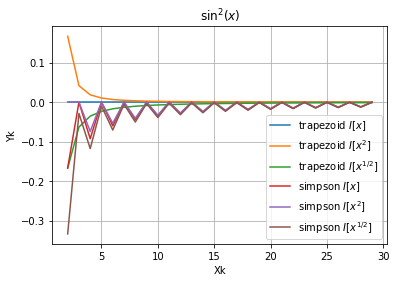

In [19]:
fig, ax = plt.subplots()
ax.plot(h, k1)
ax.plot(h, k2)
ax.plot(h, k3)
ax.plot(h, k4)
ax.plot(h, k5)
ax.plot(h, k6)

ax.set(xlabel='Xk', ylabel='Yk', title='$\sin^2(x)$')
ax.grid()
ax.legend(["trapezoid $I[x]$","trapezoid $I[x^2]$","trapezoid $I[x^{1/2}]$","simpson $I[x]$","simpson $I[x^2]$","simpson $I[x^{1/2}]$"])

plt.show()

Since the function x^2 is convex it should overestimate, concave sqrt(x) should underestimate and x is just a straight line it should be exact for all h.

# Weekly Reflection

- How do you judge the level of the last lecture on a scale from 1 to 5?
- with: 1: easy to follow, 3: OK to follow, 5: too complicated to follow

4

- How long did it take you to complete this assignment?

-

- How hard was it to finish this assignment on a scale from 1 to 5?
- with: 1: easy / no help needed, 3: could solve with guidance, 5: could not solve it

3